Alleyah Pauline C. Manalili

# Instructions

1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. 

Chosen Dataset: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Display the DataFrame
print(df)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
df = df.dropna()

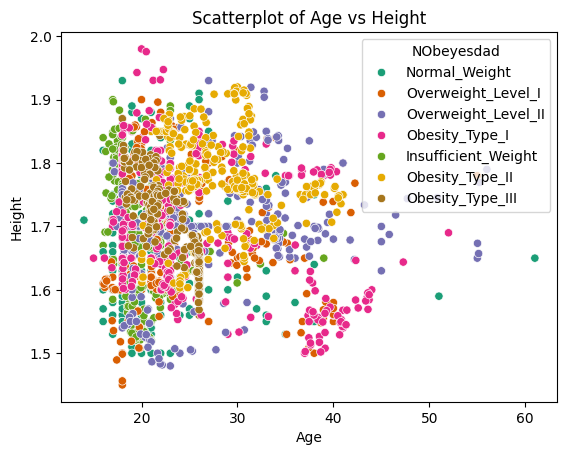

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.scatterplot(x='Age', y='Height', data=df, hue='NObeyesdad', palette='Dark2')
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Scatterplot of Age vs Height')
plt.legend(title='NObeyesdad')
plt.show()


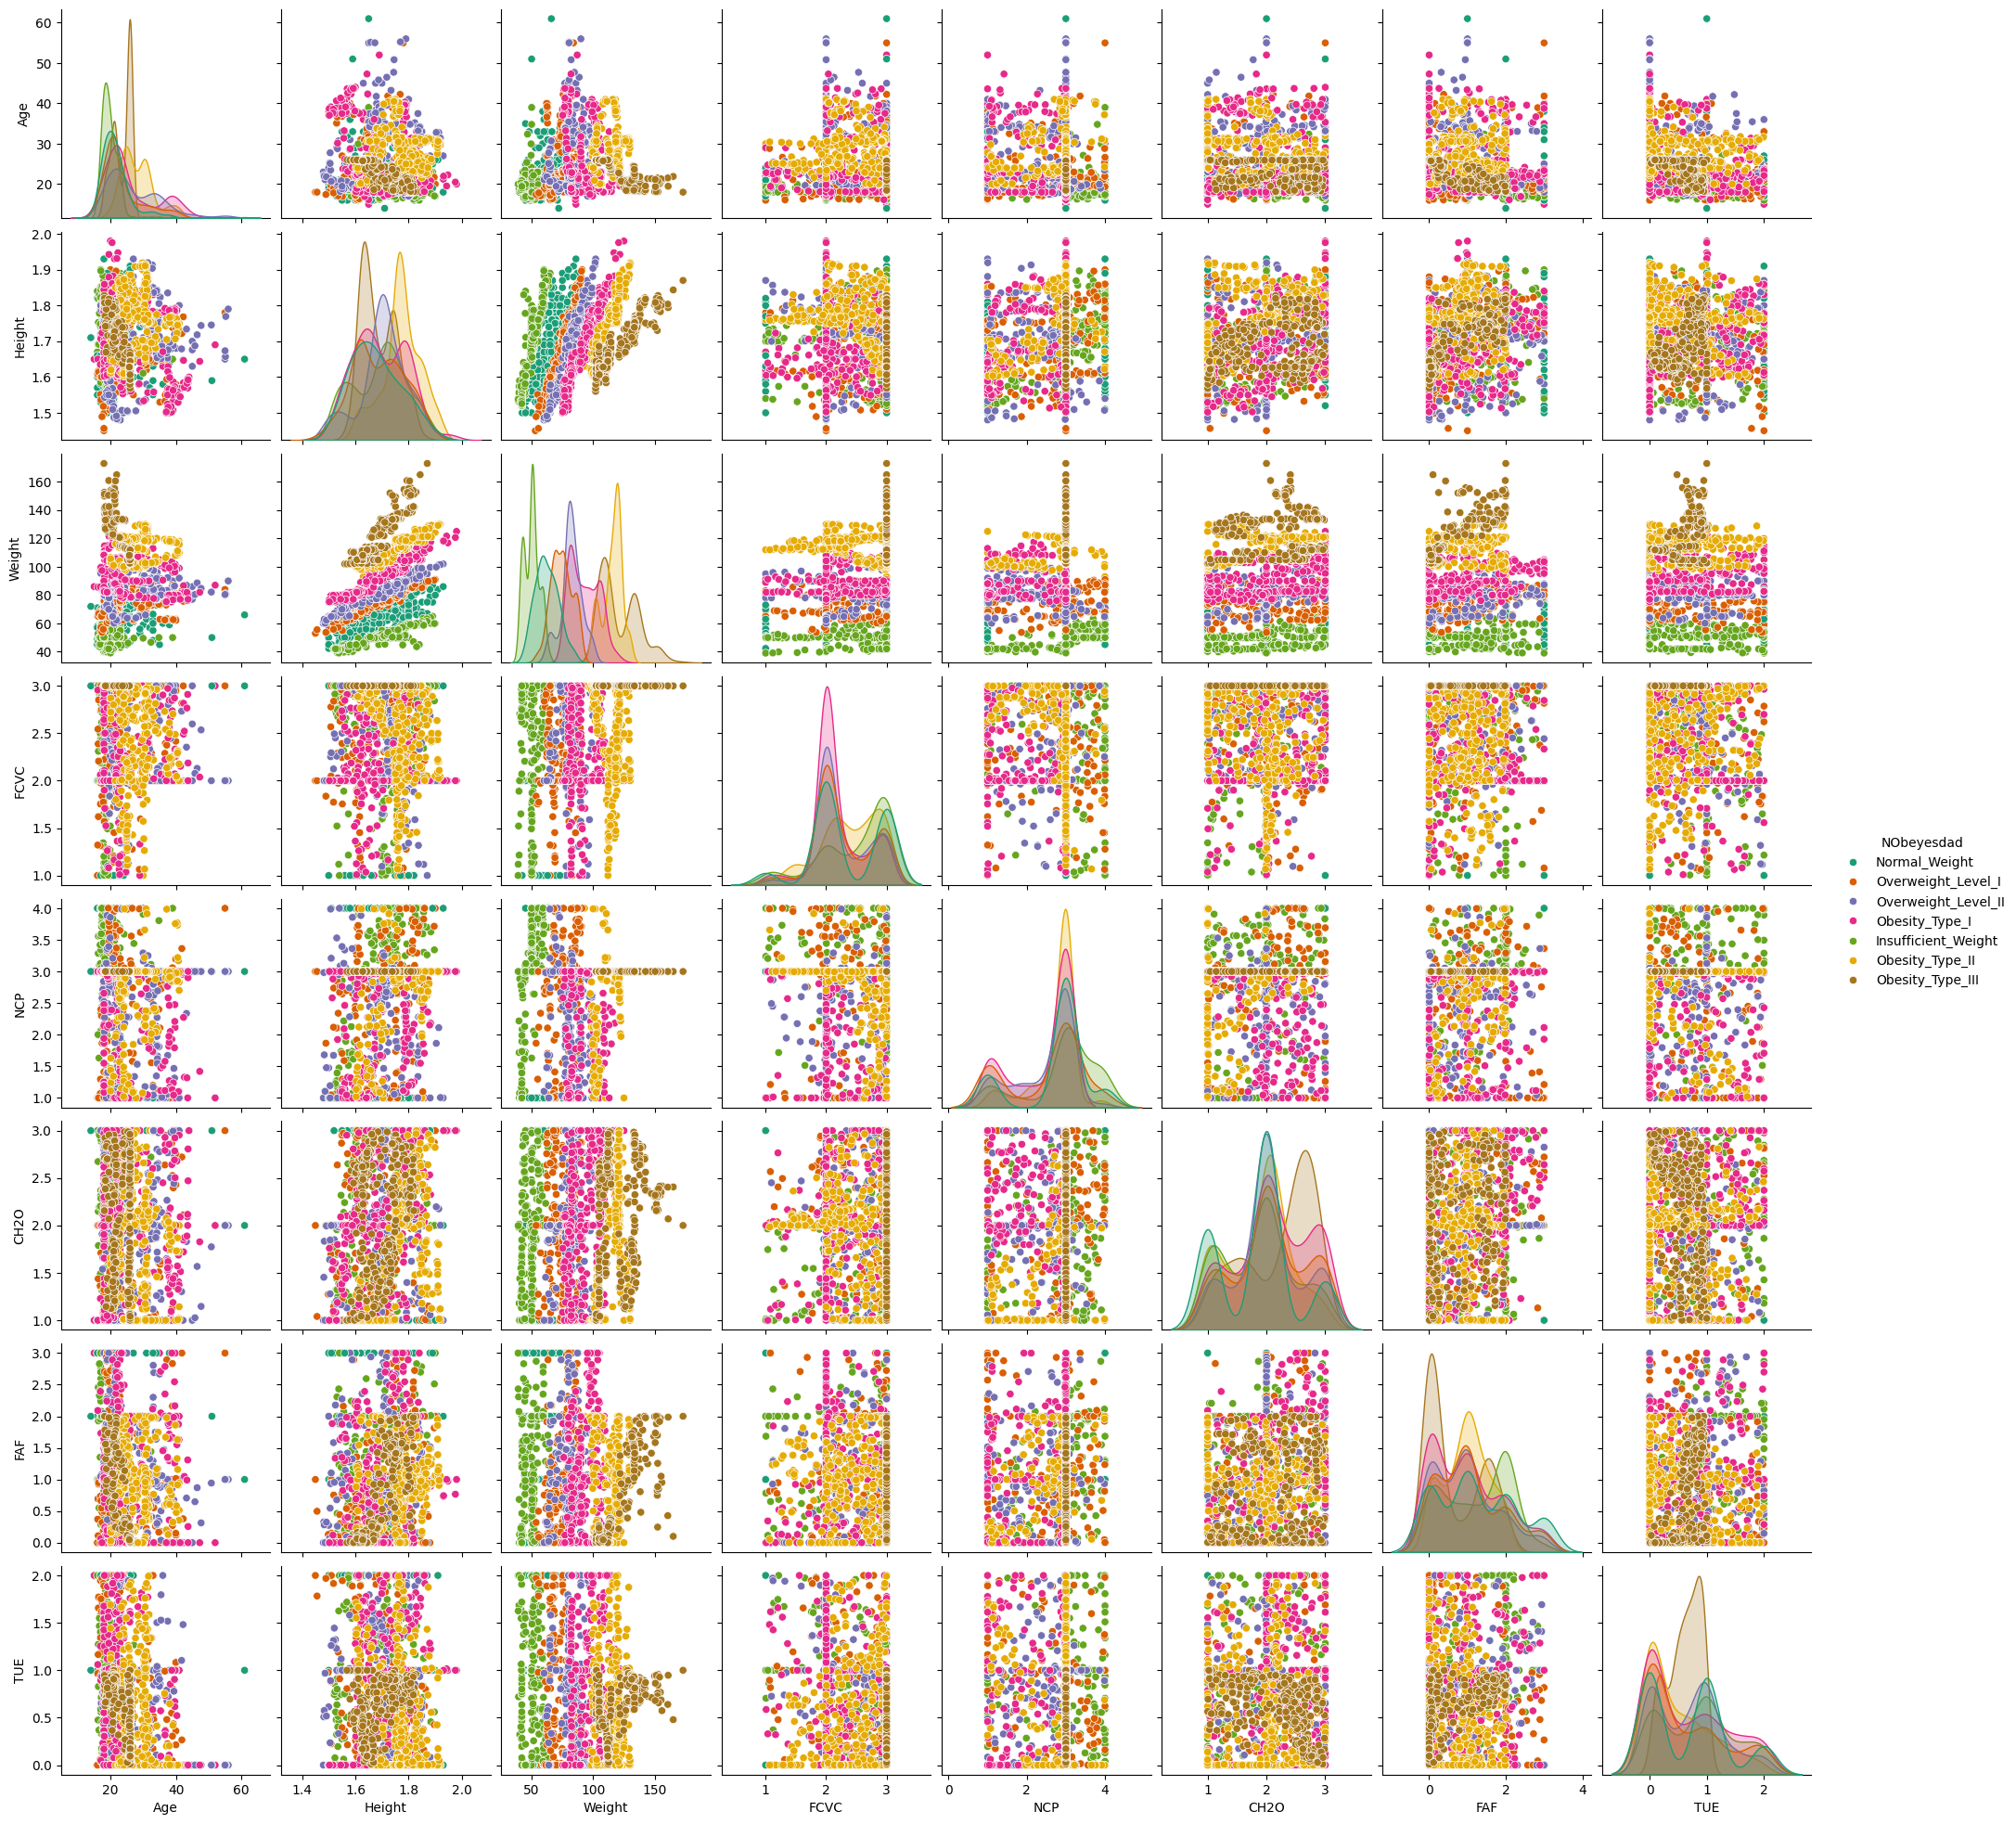

In [6]:
sns.pairplot(df, hue='NObeyesdad', palette='Dark2')

## Train | Test Split

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

categorical_cols = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
    'SCC', 'CALC', 'MTRANS', 'NObeyesdad'
]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

base_pred = model.predict(X_test)

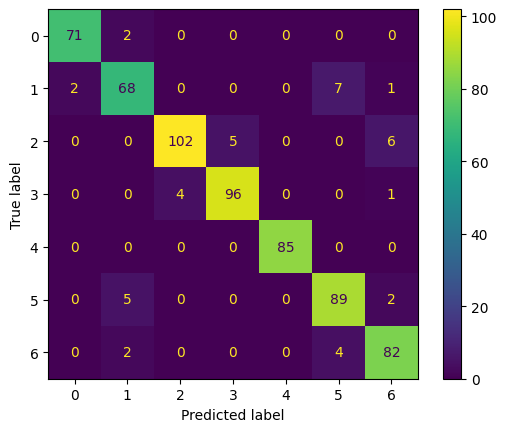

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Assuming 'model' is your trained classifier and X_test, y_test are your test datasets.
# First, you need to predict the test set outcomes.
y_pred = model.predict(X_test)

# Now, compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Then, create the display object for the confusion matrix.
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Finally, use the display object to plot the matrix.
cmd.plot()
plt.show()  # This line is to make sure the plot is displayed in some environments.

In [12]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.88      0.87      0.88        78
           2       0.96      0.90      0.93       113
           3       0.95      0.95      0.95       101
           4       1.00      1.00      1.00        85
           5       0.89      0.93      0.91        96
           6       0.89      0.93      0.91        88

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



In [13]:
model.feature_importances_

array([0.1564113 , 0.06861914, 0.2533223 , 0.43742897, 0.00210892,
       0.02910767, 0.01064517, 0.00365317, 0.0082077 , 0.00151122,
       0.00225537, 0.        , 0.01285955, 0.01060554, 0.0004773 ,
       0.00278668])

In [14]:
feature_importances = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

print(feature_importances)

                                Feature Importance
Gender                                    0.156411
Age                                       0.068619
Height                                    0.253322
Weight                                    0.437429
family_history_with_overweight            0.002109
FAVC                                      0.029108
FCVC                                      0.010645
NCP                                       0.003653
CAEC                                      0.008208
SMOKE                                     0.001511
CH2O                                      0.002255
SCC                                       0.000000
FAF                                       0.012860
TUE                                       0.010606
CALC                                      0.000477
MTRANS                                    0.002787


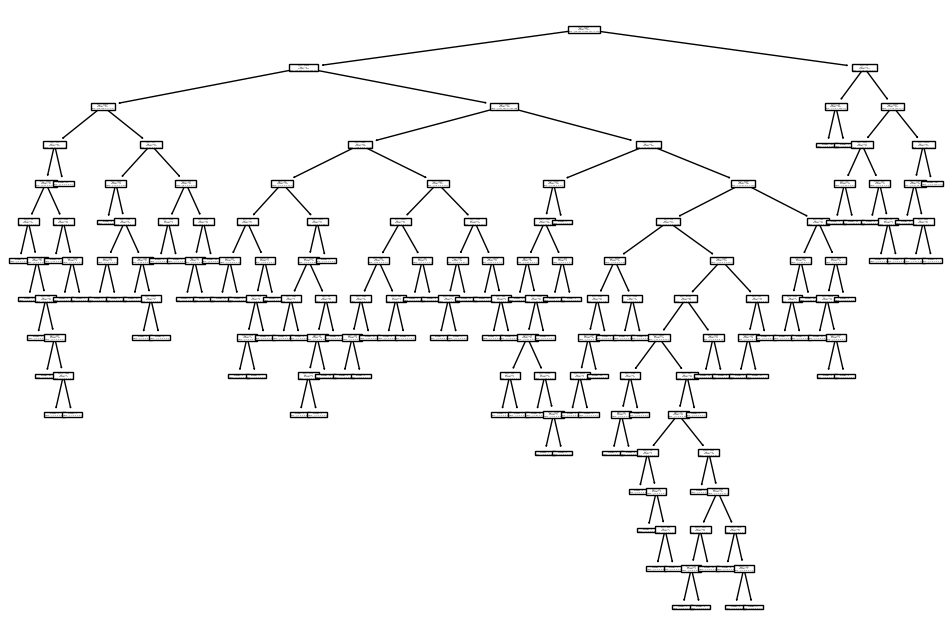

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model);

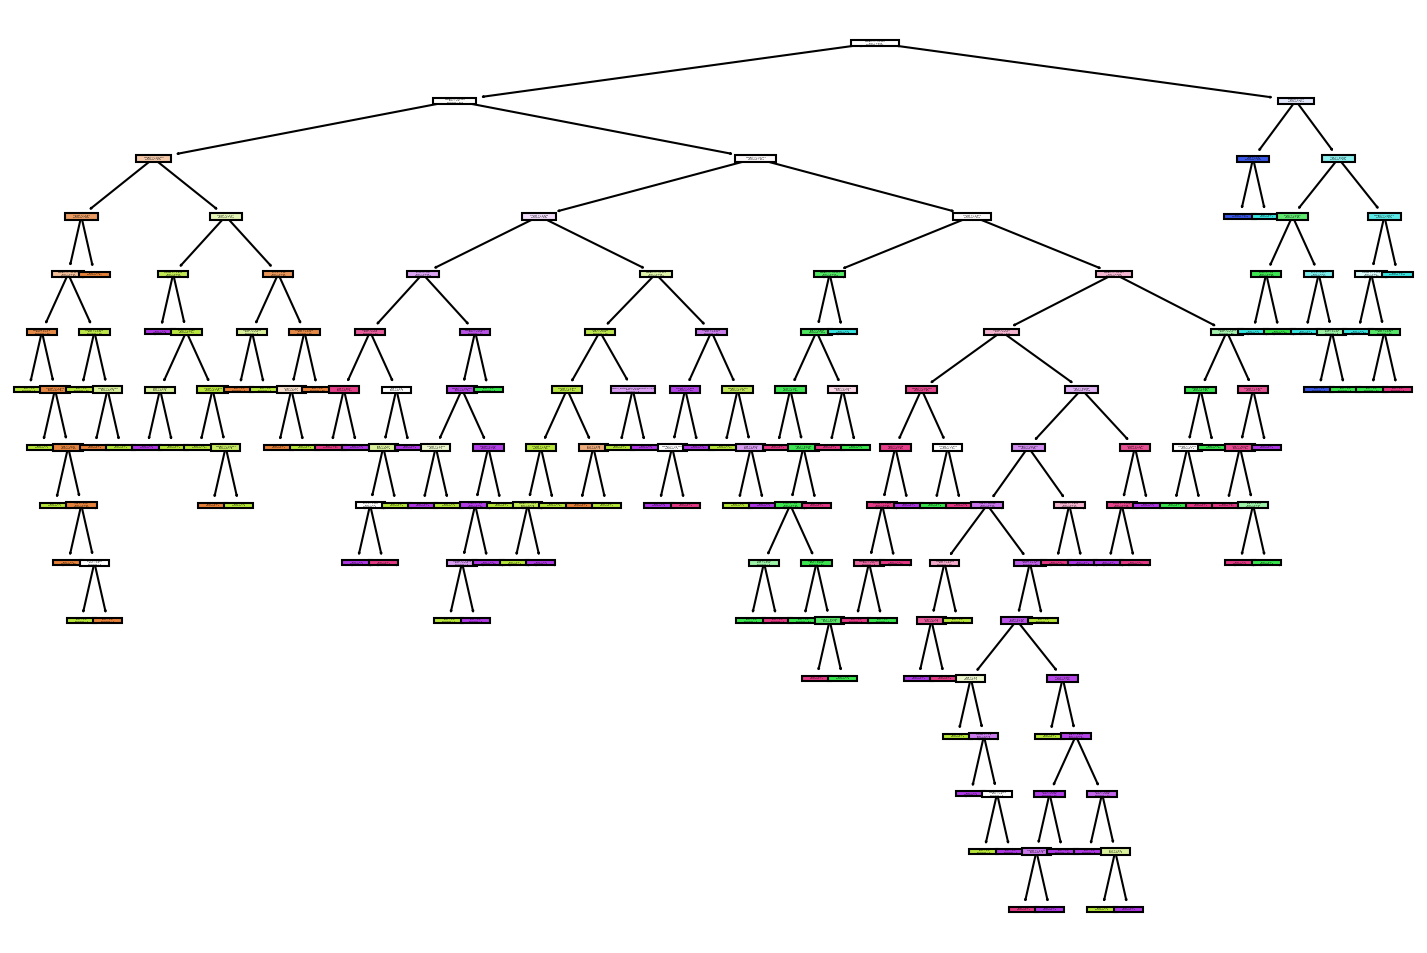

In [17]:
plt.figure(figsize=(12, 8), dpi=150)
plot_tree(model, filled=True, feature_names=df.drop('NObeyesdad', axis=1).columns)
plt.show()

## Reporting Model Results

In [29]:
def report_model(model, X_test, y_test):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds, zero_division=1))
    print('\n')
    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=X_test.columns)

In [30]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.65      0.96      0.77        73
           1       1.00      0.00      0.00        78
           2       1.00      0.00      0.00       113
           3       0.76      0.98      0.86       101
           4       1.00      1.00      1.00        85
           5       1.00      0.00      0.00        96
           6       0.28      0.98      0.43        88

    accuracy                           0.54       634
   macro avg       0.81      0.56      0.44       634
weighted avg       0.82      0.54      0.42       634





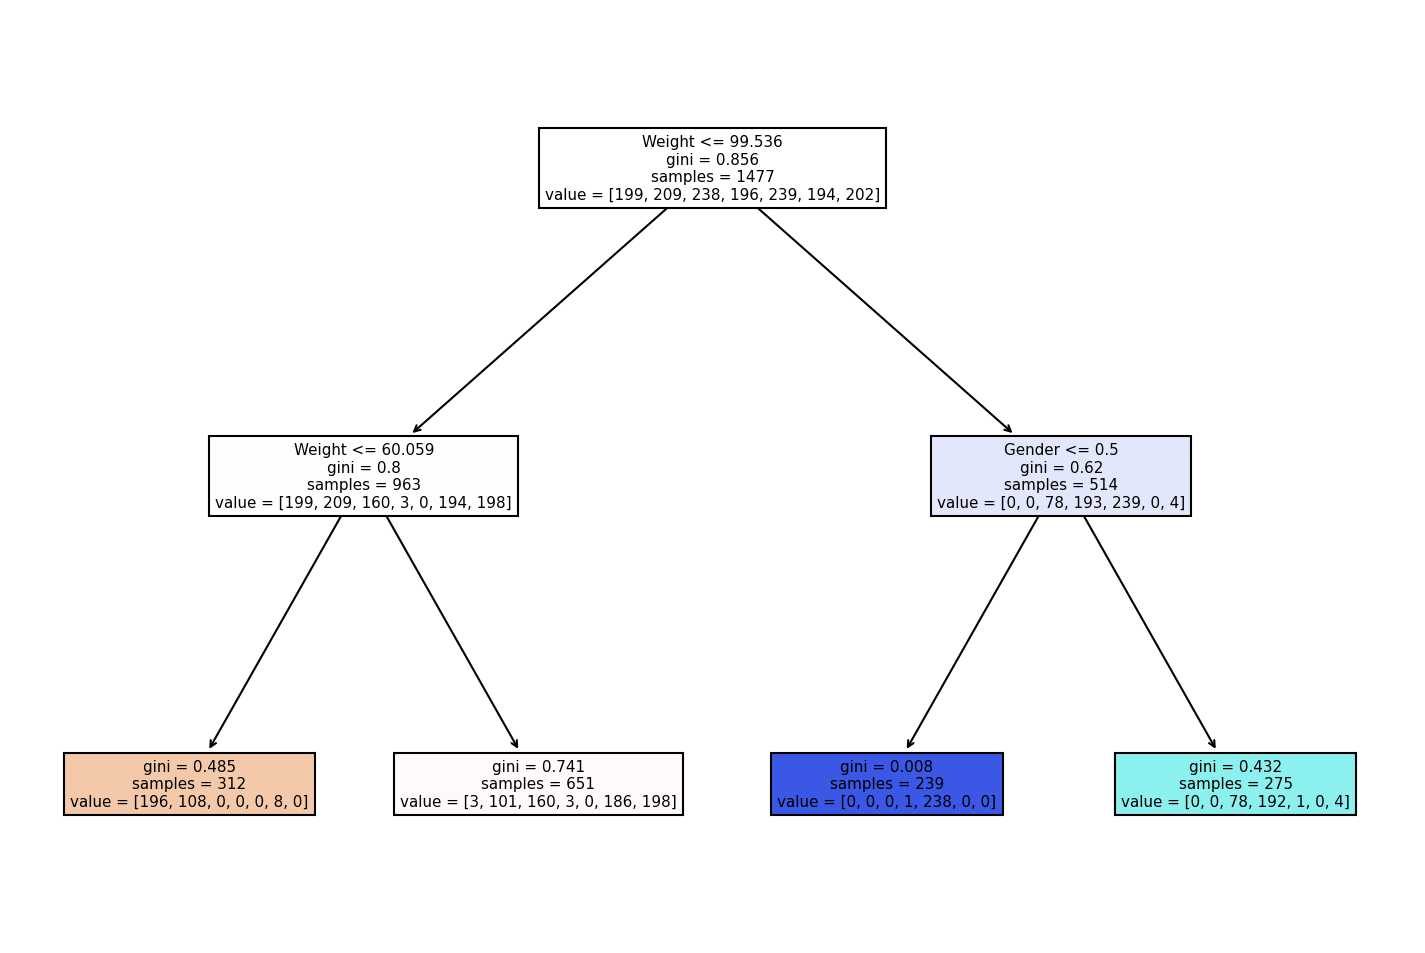

In [32]:
report_model(pruned_tree, X_test, y_test)

## Max Leaf Nodes

In [33]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        73
           1       0.19      1.00      0.31        78
           2       1.00      0.00      0.00       113
           3       0.76      0.98      0.86       101
           4       1.00      1.00      1.00        85
           5       1.00      0.00      0.00        96
           6       1.00      0.00      0.00        88

    accuracy                           0.41       634
   macro avg       0.85      0.43      0.31       634
weighted avg       0.86      0.41      0.31       634





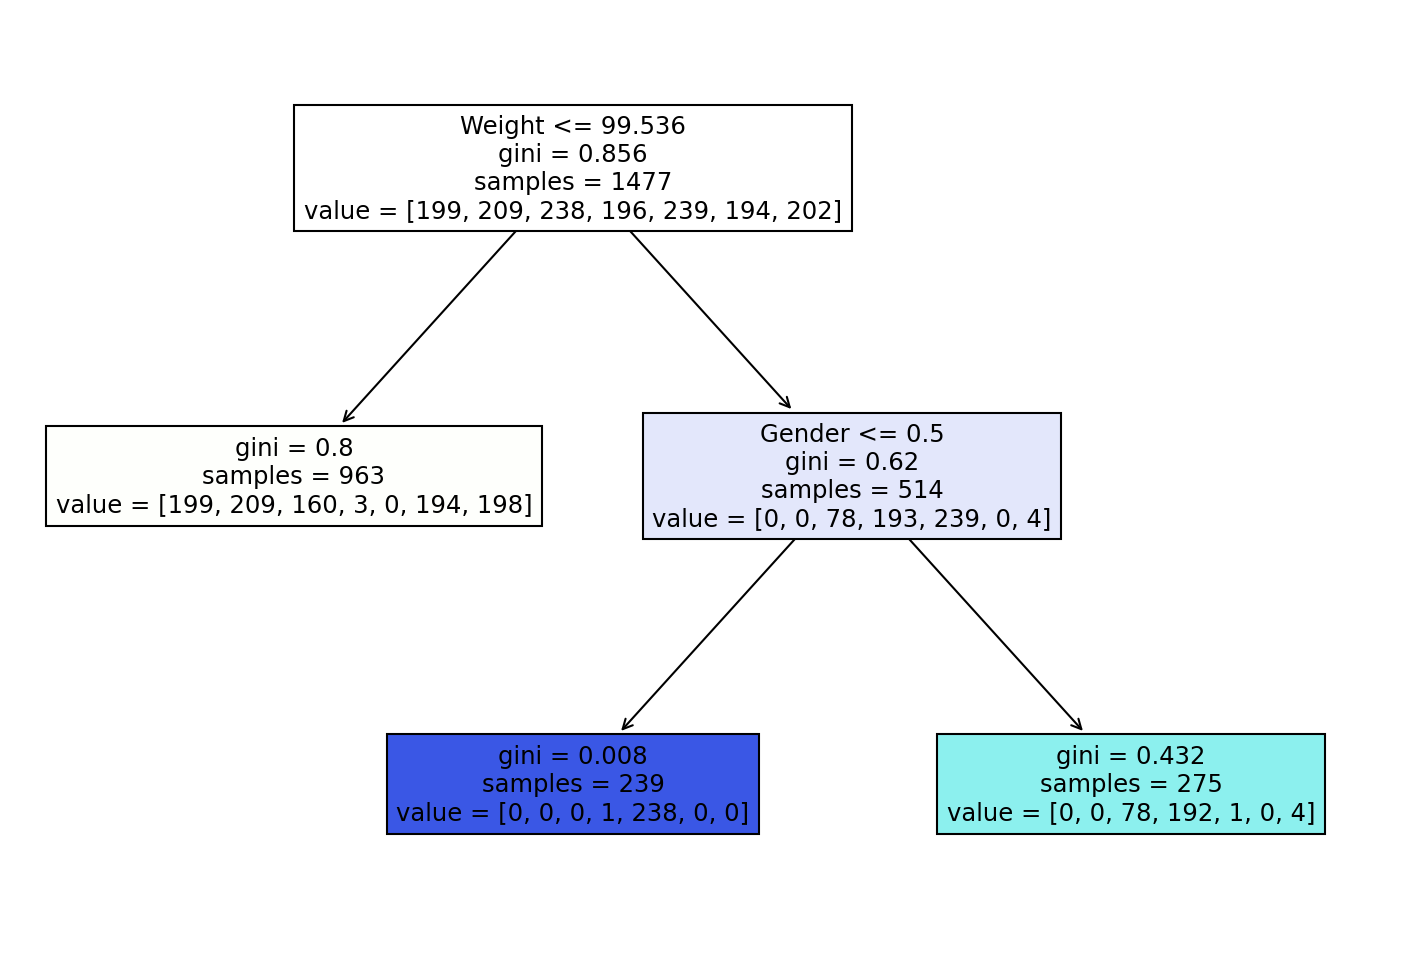

In [35]:
report_model(pruned_tree, X_test, y_test)

## Criterion

In [36]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.93      0.95      0.94        78
           2       0.99      0.89      0.94       113
           3       0.95      0.99      0.97       101
           4       1.00      1.00      1.00        85
           5       0.96      0.91      0.93        96
           6       0.85      0.98      0.91        88

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634





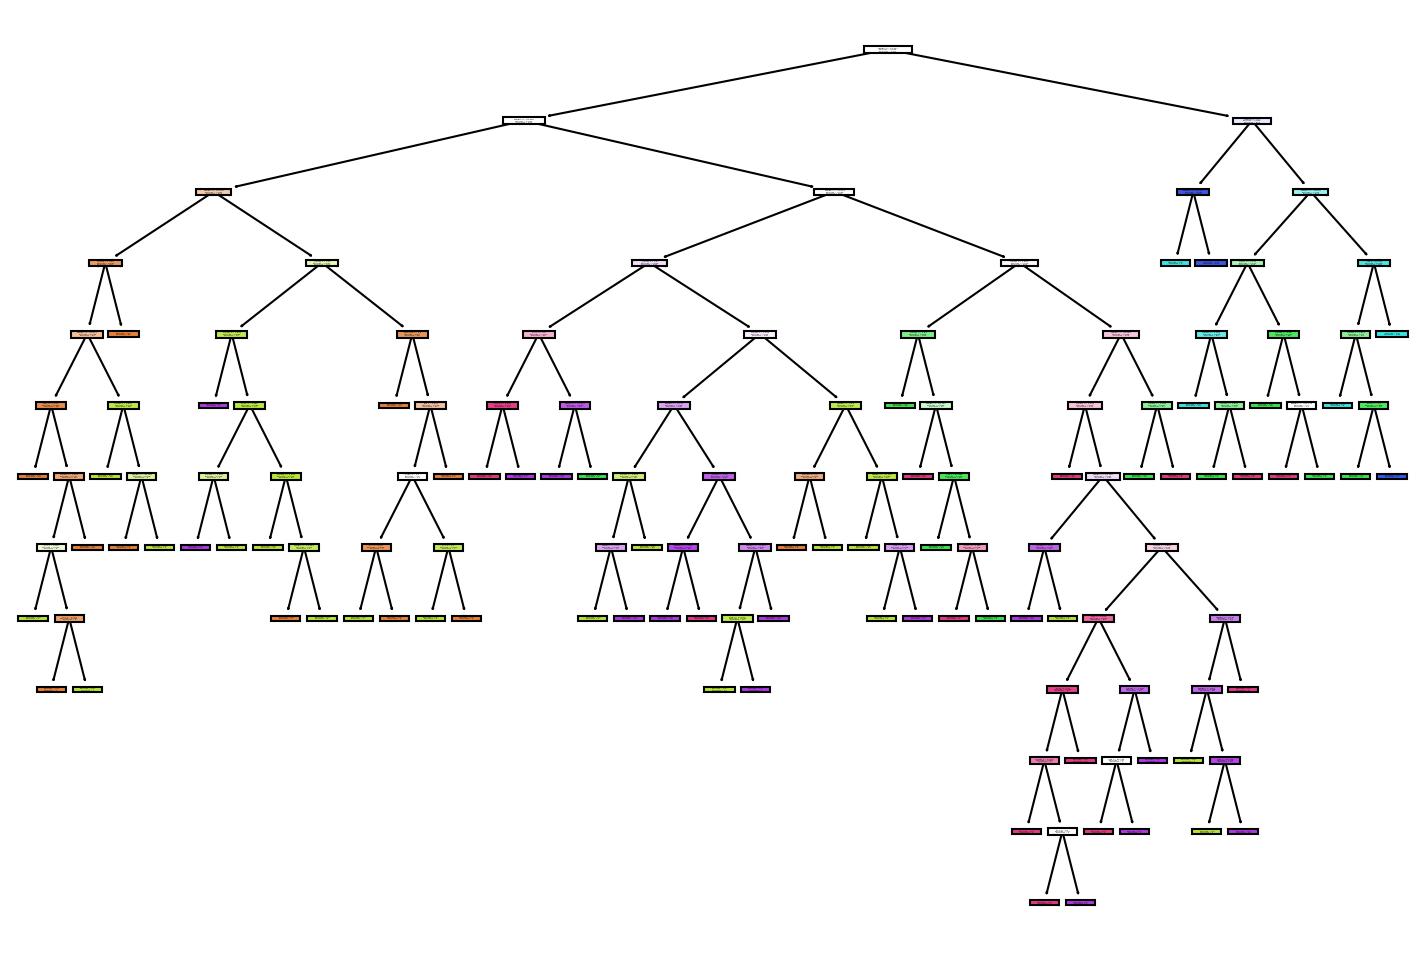

In [38]:
report_model(entropy_tree, X_test, y_test)